In [35]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

(X_train, y_train), (X_test, y_test) = mnist.load_data()

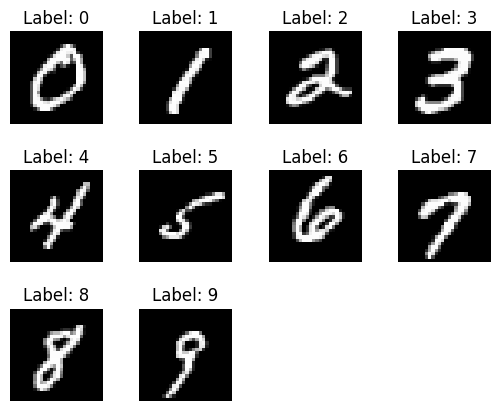

In [36]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

(X_train, y_train), (X_test, y_test) = mnist.load_data()

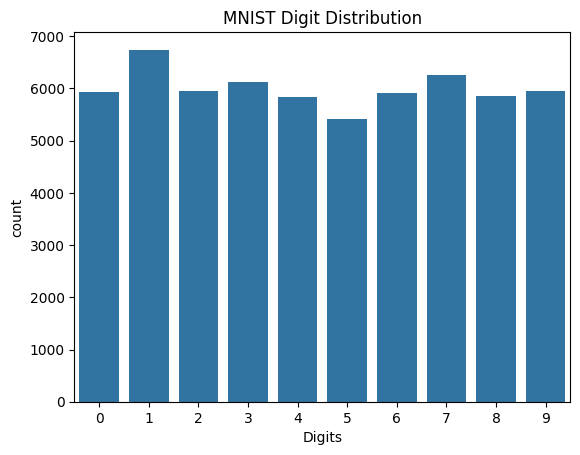

In [37]:
sns.countplot(x=np.array(y_train))
plt.xlabel('Digits')
plt.title("MNIST Digit Distribution");

In [38]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [39]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [40]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10


938/938 [==============================] - 2s 2ms/step - loss: 0.8779 - accuracy: 0.7770 - val_loss: 0.4016 - val_accuracy: 0.8957
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3630 - accuracy: 0.8986 - val_loss: 0.3074 - val_accuracy: 0.9143
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3022 - accuracy: 0.9142 - val_loss: 0.2688 - val_accuracy: 0.9247
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2689 - accuracy: 0.9222 - val_loss: 0.2457 - val_accuracy: 0.9297
Epoch 5/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9299 - val_loss: 0.2317 - val_accuracy: 0.9334
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2265 - accuracy: 0.9351 - val_loss: 0.2113 - val_accuracy: 0.9384
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2110 - accuracy: 0.9392 - val_loss: 0.2028 - val_accuracy: 0.9430
Epoch 8/10
938/93

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

 97/313 [========>.....................] - ETA: 0s - loss: 0.2189 - accuracy: 0.9359

313/313 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9508
Test accuracy: 0.9508


In [43]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 0s 893us/step


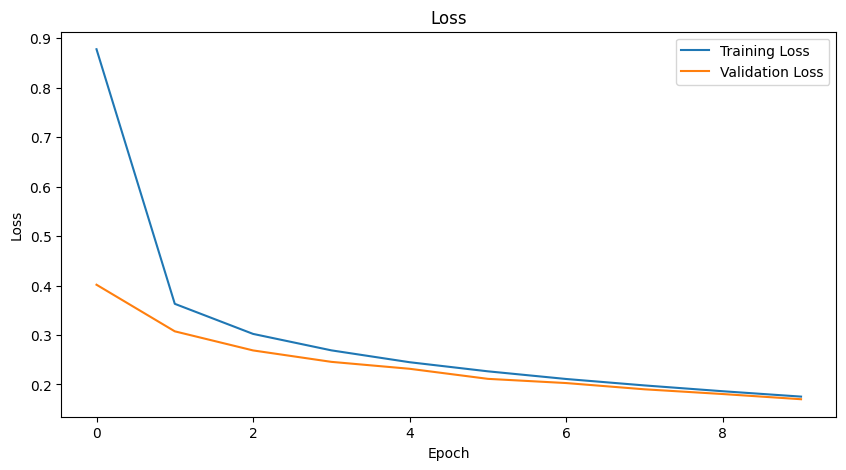

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

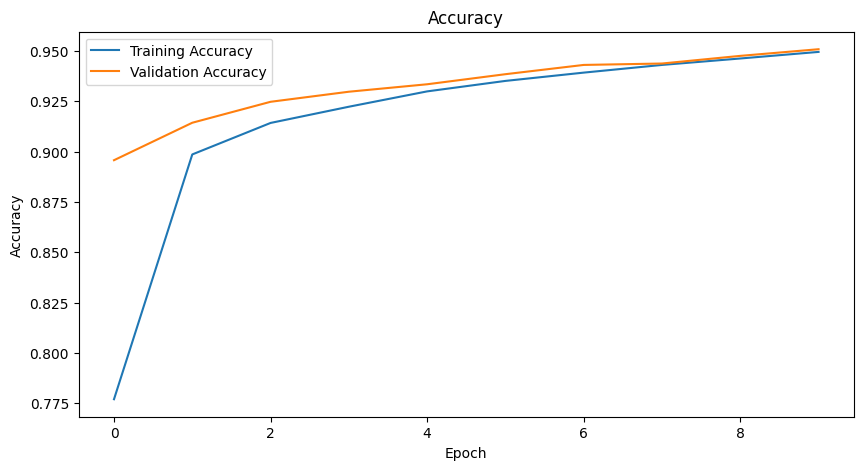

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

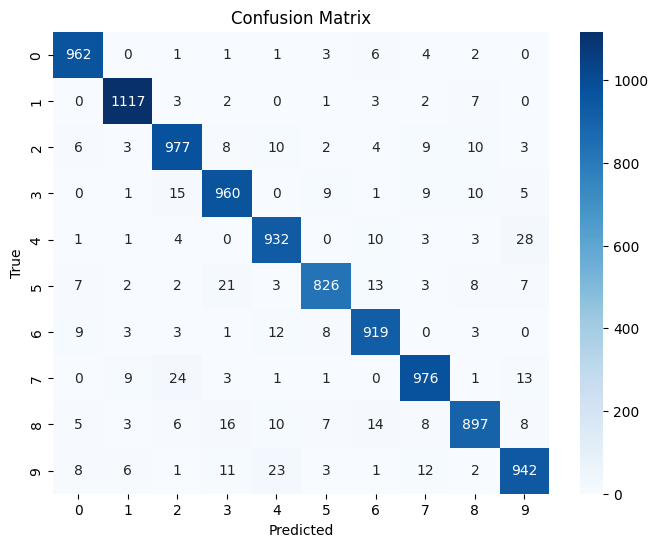

In [48]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()